In [16]:
# Importing the Keras libraries and packages
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [2]:
dress_patterns_df = pd.read_csv('dress_patterns.csv')
dress_patterns = dress_patterns_df.values
dress_patterns_df.head()

,_unit_id,category,category:confidence,image_url
0,851505458,ikat,0.3487,http://s3-eu-west-1.amazonaws.com/we-attribute...
1,851505459,plain,1.0000,http://s3-eu-west-1.amazonaws.com/we-attribute...
2,851505460,polka dot,0.6709,http://s3-eu-west-1.amazonaws.com/we-attribute...
3,851505461,plain,1.0000,http://s3-eu-west-1.amazonaws.com/we-attribute...
4,851505462,geometry,0.7035,http://s3-eu-west-1.amazonaws.com/we-attribute...


In [3]:
print(os.listdir('dataset_category'))
print(os.listdir('dataset_category/animal'))

['animal', 'cartoon', 'chevron', 'floral', 'geometry', 'houndstooth', 'ikat', 'letter_numb', 'OTHER', 'plain', 'polka dot', 'scales', 'skull', 'squares', 'stars', 'stripes', 'tribal']
['851507127.jpg', '851507198.jpg', '851507211.jpg', '851507216.jpg', '851507220.jpg', '851507284.jpg', '851508641.jpg', '851508661.jpg', '851508681.jpg', '851508682.jpg', '851508747.jpg', '851509034.jpg', '851509039.jpg', '851509079.jpg', '851509148.jpg', '851509185.jpg', '851509278.jpg', '851509300.jpg', '851518030.jpg', '851518077.jpg', '851518123.jpg', '851518193.jpg', '851518238.jpg', '851518295.jpg', '851518320.jpg', '851518376.jpg', '851518427.jpg', '851518484.jpg', '851518509.jpg', '851518557.jpg', '851518558.jpg', '851518570.jpg', '851518574.jpg', '851518582.jpg', '851518605.jpg', '851507134.jpg', '851509327.jpg', '851510460.jpg', '851511384.jpg', '851518022.jpg', '851518758.jpg', '851519229.jpg', '851519553.jpg', '851520314.jpg', '851518793.jpg', '851518798.jpg', '851518805.jpg', '851518826.jpg',

In [4]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 17, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [5]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset_category',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('dataset_category_test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 8074 images belonging to 17 classes.
Found 1231 images belonging to 17 classes.


In [6]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 17)                2193      
Total para

In [7]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 800,
                         epochs = 5,
                         validation_data = test_set,
                         validation_steps = 200)

Epoch 1/5
800/800 [==============================] - 1334s 2s/step - loss: 0.1361 - acc: 0.9534 - val_loss: 0.1660 - val_acc: 0.9527
Epoch 2/5
800/800 [==============================] - 1426s 2s/step - loss: 0.1259 - acc: 0.9583 - val_loss: 0.1607 - val_acc: 0.9537
Epoch 3/5
800/800 [==============================] - 1256s 2s/step - loss: 0.1203 - acc: 0.9598 - val_loss: 0.1700 - val_acc: 0.9497
Epoch 4/5
800/800 [==============================] - 1166s 1s/step - loss: 0.1143 - acc: 0.9612 - val_loss: 0.1762 - val_acc: 0.9513
Epoch 5/5
800/800 [==============================] - 1189s 1s/step - loss: 0.1071 - acc: 0.9632 - val_loss: 0.1786 - val_acc: 0.9503


In [8]:
# Save Model to Disk
# serialize model to JSON
model_json = classifier.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
classifier.save_weights("model.h5")
print("Saved model to disk")
 

Saved model to disk


#  TEST single image

In [9]:
os.listdir('dataset_category_test/plain')

['851505459.jpg',
 '851505461.jpg',
 '851505464.jpg',
 '851505465.jpg',
 '851505467.jpg',
 '851505469.jpg',
 '851505470.jpg',
 '851505473.jpg',
 '851505474.jpg',
 '851505479.jpg',
 '851505481.jpg',
 '851505482.jpg',
 '851505486.jpg',
 '851505489.jpg',
 '851505496.jpg',
 '851505497.jpg',
 '851505501.jpg',
 '851505504.jpg',
 '851505506.jpg',
 '851505507.jpg',
 '851505509.jpg',
 '851505512.jpg',
 '851505513.jpg',
 '851505519.jpg',
 '851505521.jpg',
 '851505523.jpg',
 '851505529.jpg',
 '851505531.jpg',
 '851505533.jpg',
 '851505534.jpg',
 '851505541.jpg',
 '851505542.jpg',
 '851505544.jpg',
 '851505547.jpg',
 '851505551.jpg',
 '851505557.jpg',
 '851505562.jpg',
 '851505563.jpg',
 '851505565.jpg',
 '851505567.jpg',
 '851505574.jpg',
 '851505578.jpg',
 '851505579.jpg',
 '851505581.jpg',
 '851505583.jpg',
 '851505584.jpg',
 '851505585.jpg',
 '851505586.jpg',
 '851505590.jpg',
 '851505593.jpg',
 '851505594.jpg',
 '851505602.jpg',
 '851505604.jpg',
 '851505605.jpg',
 '851505607.jpg',
 '85150560

In [11]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset_category_test/plain/851505531.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

{'OTHER': 0,
 'animal': 1,
 'cartoon': 2,
 'chevron': 3,
 'floral': 4,
 'geometry': 5,
 'houndstooth': 6,
 'ikat': 7,
 'letter_numb': 8,
 'plain': 9,
 'polka dot': 10,
 'scales': 11,
 'skull': 12,
 'squares': 13,
 'stars': 14,
 'stripes': 15,
 'tribal': 16}

In [12]:
result[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [13]:
index = np.where(result[0] == 1)[0][0]
index

9

In [14]:
list(training_set.class_indices.keys())[list(training_set.class_indices.values()).index(index)]

'plain'

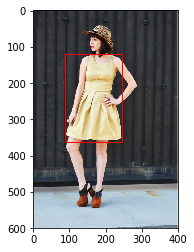

In [17]:
img = cv2.imread('dataset_category_test/plain/851505531.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))